# Predictive Maintenance with NASA Turbofan Engine Degradation Dataset

 A machine learning model to predict the Remaining Useful Life (RUL) of the engines. This can provide insights into predictive maintenance strategies.

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data
***

## Data Loading and Exploration

The NASA Turbofan Engine Degradation dataset contains multiple operational settings and sensor measurements for several engine units over time. The goal is to predict the Remaining Useful Life (RUL) of each engine unit.

"Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise."

In [1]:
import pandas as pd
import numpy as np

# Load dataset
train_df = pd.read_csv('train_FD001.txt', sep=' ', header=None)
test_df = pd.read_csv('test_FD001.txt', sep=' ', header=None)
#combine data into one data frame
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
# Drop unnecessary columns (created due to space-separated values)
display(combined_df.head())
combined_df.drop(columns=[26, 27], inplace=True)
train_df.drop(columns=[26, 27], inplace=True)
original_train_df = combined_df.copy()

column_names = ['unit_number', 'time_in_cycles', 'operational_setting_1', 
              'operational_setting_2', 'operational_setting_3'] + \
             [ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio)",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
# Assign column names based on the dataset documentation
combined_df.columns = column_names
train_df.columns = column_names
# Displays the first 5 rows
combined_df.head()
combined_df.describe()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

unit_number  time_in_cycles  operational_setting_1  \
count  33727.000000    33727.000000           33727.000000   
mean      51.521066       96.393572              -0.000010   
std       28.866537       65.100528               0.002193   
min        1.000000        1.000000              -0.008700   
25%       27.000000       43.000000              -0.001500   
50%       52.000000       88.000000               0.000000   
75%       77.000000      140.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3  \
count           33727.000000                33727.0   
mean                0.000003                  100.0   
std                 0.000293                    0.0   
min                -0.000600                  100.0   
25%                -0.000200                  100.0   
50%                 0.000000                  100.0   
75%                 0.000300                  100.0   
max                 0.000700                  100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
count                  3.372700e+04                   33727.000000   
mean                   5.186700e+02                     642.601005   
std                    7.276065e-12                       0.474789   
min                    5.186700e+02                     641.130000   
25%                    5.186700e+02                     642.270000   
50%                    5.186700e+02                     642.560000   
75%                    5.186700e+02                     642.890000   
max                    5.186700e+02                     644.530000   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
count                   33727.000000                   33727.000000   
mean                     1589.581927                    1407.303559   
std                         5.840324                       8.432656   
min                      1569.040000                    1382.250000   
25%                      1585.530000                    1401.230000   
50%                      1589.210000                    1406.450000   
75%                      1593.160000                    1412.240000   
max                      1616.910000                    1441.490000   

       (Fan inlet Pressure) (psia)  ...  \
count                 3.372700e+04  ...   
mean                  1.462000e+01  ...   
std                   3.884950e-12  ...   
min                   1.462000e+01  ...   
25%                   1.462000e+01  ...   
50%                   1.462000e+01  ...   
75%                   1.462000e+01  ...   
max                   1.462000e+01  ...   

       (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  \
count                             33727.000000                 33727.000000   
mean                                521.543259                  2388.086395   
std                                   0.693464                     0.067620   
min                                 518.690000                  2387.880000   
25%                                 521.130000                  2388.040000   
50%                                 521.620000                  2388.080000   
75%                                 522.050000                  2388.130000   
max                                 523.760000                  2388.560000   

       (Corrected core speed) (rpm)  (Bypass Ratio)  (Burner fuel-air ratio)  \
count                  33727.000000    33727.000000             3.372700e+04   
mean                    8141.887005        8.435816             3.000000e-02   
std                       16.382482        0.035360             2.011268e-14   
min                     8099.940000        8.324900             3.000000e-02   
25%                     8132.780000        8.411000             3.000000e-02   
50%                     8139.620000        8.432400             3.000000e-02   
75%                   

## Data Cleaning and Preprocessing

Before we begin modeling, we'll calculate the Remaining Useful Life (RUL) for each engine unit. This is done by subtracting the current cycle time from the maximum cycle time for each unit. We'll also ensure there are no missing values and check the dataset structure.

In [2]:
# Calculate RUL for each engine unit
rul = pd.DataFrame(combined_df.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max_time_in_cycles']
# display(rul.head())
combined_df = combined_df.merge(rul, on='unit_number', how='left')
combined_df['RUL'] = combined_df['max_time_in_cycles'] - combined_df['time_in_cycles']
train_df['RUL'] = combined_df['RUL']
combined_df.drop('max_time_in_cycles', axis=1, inplace=True)
display(train_df)
# Check for missing values
display(train_df.isnull().sum())

# Display the dataset info
train_df.info()

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  \
0                    -0.0004                  100.0   
1                    -0.0003                  100.0   
2                     0.0003                  100.0   
3                     0.0000                  100.0   
4                    -0.0002                  100.0   
...                      ...                    ...   
20626                -0.0003                  100.0   
20627                -0.0005                  100.0   
20628                 0.0000                  100.0   
20629                 0.0003                  100.0   
20630                -0.0005                  100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                            518.67                         641.82   
1                            518.67                         642.15   
2                            518.67                         642.35   
3                            518.67                         642.35   
4                            518.67                         642.37   
...                             ...                            ...   
20626                        518.67                         643.49   
20627                        518.67                         643.54   
20628                        518.67                         643.42   
20629                        518.67                         643.23   
20630                        518.67                         643.85   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (Fan inlet Pressure) (psia)  ...  (Corrected fan speed) (rpm)  \
0                            14.62  ...                      2388.02   
1                            14.62  ...                      2388.07   
2                            14.62  ...                      2388.03   
3                            14.62  ...                      2388.08   
4                            14.62  ...                      2388.04   
...                            ...  ...                          ...   
20626                        14.62  ...                      2388.26   
20627                        14.62  ...                      2388.22   
20628                        14.62  ...                      2388.24   
20629                        14.62  ...                      2388.23   
20630                        14.62  ...                      2388.26   

       (Corrected core speed) (rpm)  (Bypass Ratio)  (

unit_number                                0
time_in_cycles                             0
operational_setting_1                      0
operational_setting_2                      0
operational_setting_3                      0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_number                              20631 non-null  int64  
 1   time_in_cycles                           20631 non-null  int64  
 2   operational_setting_1                    20631 non-null  float64
 3   operational_setting_2                    20631 non-null  float64
 4   operational_setting_3                    20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

## Data Analysis and Visualization

Analyze the distribution of Remaining Useful Life (RUL) across all engine units. We'll also visualize how the RUL changes over time for a specific engine unit to understand the degradation process.

unit_number  time_in_cycles  operational_setting_1  \
count  33727.000000    33727.000000           33727.000000   
mean      51.521066       96.393572              -0.000010   
std       28.866537       65.100528               0.002193   
min        1.000000        1.000000              -0.008700   
25%       27.000000       43.000000              -0.001500   
50%       52.000000       88.000000               0.000000   
75%       77.000000      140.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3  \
count           33727.000000                33727.0   
mean                0.000003                  100.0   
std                 0.000293                    0.0   
min                -0.000600                  100.0   
25%                -0.000200                  100.0   
50%                 0.000000                  100.0   
75%                 0.000300                  100.0   
max                 0.000700                  100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
count                  3.372700e+04                   33727.000000   
mean                   5.186700e+02                     642.601005   
std                    7.276065e-12                       0.474789   
min                    5.186700e+02                     641.130000   
25%                    5.186700e+02                     642.270000   
50%                    5.186700e+02                     642.560000   
75%                    5.186700e+02                     642.890000   
max                    5.186700e+02                     644.530000   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
count                   33727.000000                   33727.000000   
mean                     1589.581927                    1407.303559   
std                         5.840324                       8.432656   
min                      1569.040000                    1382.250000   
25%                      1585.530000                    1401.230000   
50%                      1589.210000                    1406.450000   
75%                      1593.160000                    1412.240000   
max                      1616.910000                    1441.490000   

       (Fan inlet Pressure) (psia)  ...  (Corrected fan speed) (rpm)  \
count                 3.372700e+04  ...                 33727.000000   
mean                  1.462000e+01  ...                  2388.086395   
std                   3.884950e-12  ...                     0.067620   
min                   1.462000e+01  ...                  2387.880000   
25%                   1.462000e+01  ...                  2388.040000   
50%                   1.462000e+01  ...                  2388.080000   
75%                   1.462000e+01  ...                  2388.130000   
max                   1.462000e+01  ...                  2388.560000   

       (Corrected core speed) (rpm)  (Bypass Ratio)  (Burner fuel-air ratio)  \
count                  33727.000000    33727.000000             3.372700e+04   
mean                    8141.887005        8.435816             3.000000e-02   
std                       16.382482        0.035360             2.011268e-14   
min                     8099.940000        8.324900             3.000000e-02   
25%                     8132.780000        8.411000             3.000000e-02   
50%                     8139.620000        8.432400             3.000000e-02   
75%                     8146.600000        8.457000             3.000000e-02   
max                     8293.720000        8.584800             3.000000e-02   

       (Bleed Enthalpy)  (Required fan speed)  \
count      33727.000000               33727.0   
mean         392.962523                2388.0   
std            1.468023                   0.0   
min          388.000000                2388.0   
25%          392.000000                2388.0   
50%          393.0

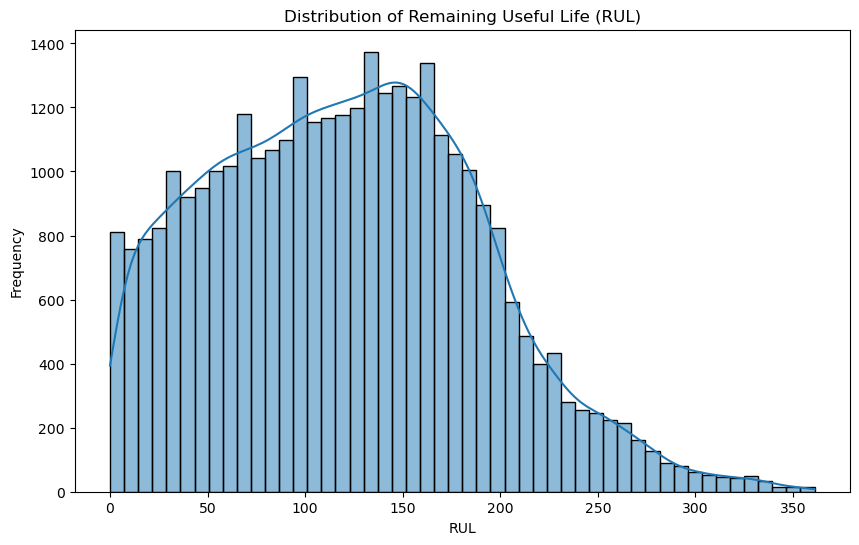

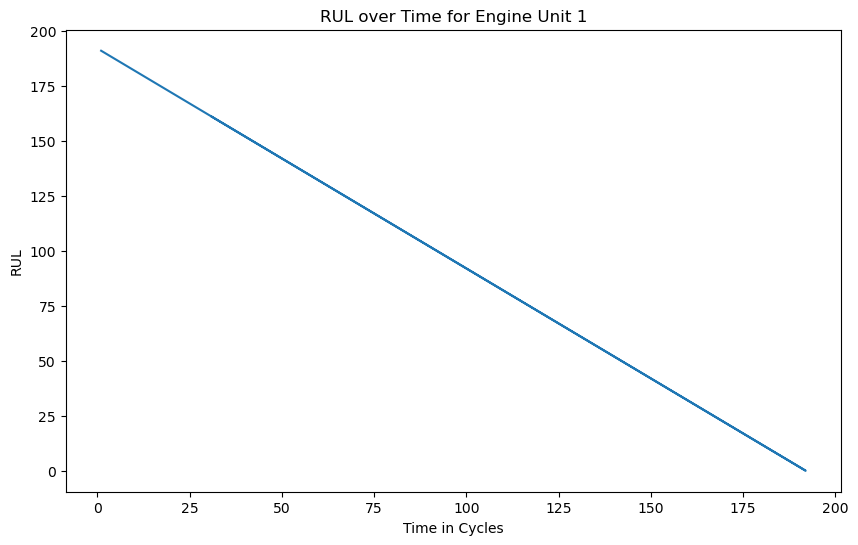

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical analysis
display(combined_df.describe())

# Visualization: Distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['RUL'], kde=True, bins=50)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

#Visualization: RUL over time for a specific engine unit
plt.figure(figsize=(10, 6))
unit_example = combined_df[combined_df['unit_number'] == 1]
plt.plot(unit_example['time_in_cycles'], unit_example['RUL'])
plt.title('RUL over Time for Engine Unit 1')
plt.xlabel('Time in Cycles')
plt.ylabel('RUL')
plt.show()


In [ ]:
combined_df.to_excel("testData.xlsx", index=False)

# Machine Learning Initial run 

Random forest is good for complex, high-dimensional, noisy data, so well use a Random Forest regressor to predict the Remaining Useful Life (RUL) of the engines. After splitting our data into training and testing sets, we'll train the model and evaluate its performance by calculating the Mean Squared Error.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Prepare the data for machine learning
feature_columns = [col for col in combined_df.columns if col not in ['unit_number', 'RUL']]
X = combined_df[feature_columns]
# seperate the target feature
y = combined_df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42) #initialize model
model.fit(X_train, y_train) #train model

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Display the Mean Squared Error
print(f'Mean Squared Error of the model: {mse:.2f}')
print(type(y_pred))
print(type(y_test))

Root Mean Squared Error: 39.86
Mean Squared Error of the model: 1588.75
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


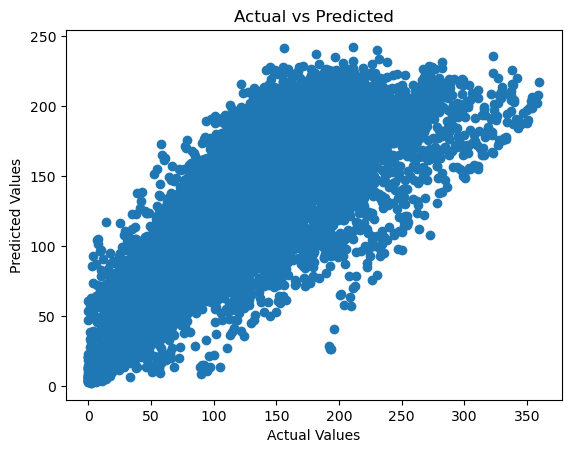

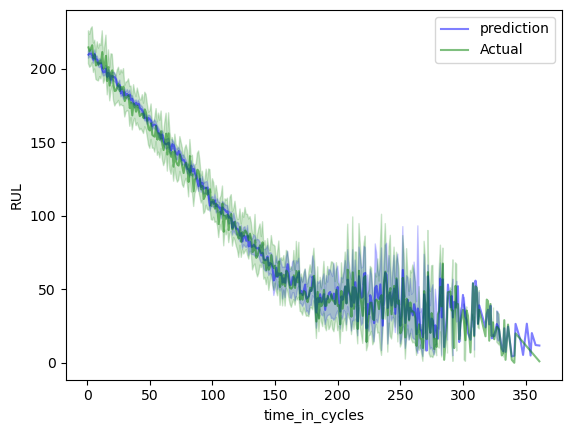

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

sns.lineplot(x=X_test["time_in_cycles"], y=y_pred, color = 'blue', label = 'prediction', alpha = 0.5)
sns.lineplot(x=X_test['time_in_cycles'], y=y_test, color = 'green', label = 'Actual', alpha = 0.5)
plt.show()

In [6]:
residuals = y_test - y_pred
display(residuals)
residuals.describe()

11764   -19.14
23945   -42.75
14136    -2.61
13309    30.88
1807    -24.23
         ...  
22807   -57.49
554     -27.40
5663    -43.96
12195    16.22
9099     -7.37
Name: RUL, Length: 10119, dtype: float64

count    10119.000000
mean        -1.342740
std         39.838523
min       -115.400000
25%        -25.585000
50%         -7.220000
75%         13.635000
max        167.680000
Name: RUL, dtype: float64

## Feature Importance 
Analyze which features have the biggest impact on our model

In [7]:
# create new data frame with feature and importance columns
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#sort by importance
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
display(importance_df)


Feature  Importance
0                            time_in_cycles    0.595306
14      (HPC outlet Static pressure) (psia)    0.067063
7             (LPT outlet temperature) (◦R)    0.038822
12              (Physical core speed) (rpm)    0.034769
17             (Corrected core speed) (rpm)    0.030931
15  (Ratio of fuel flow to Ps30) (pps/psia)    0.025332
10             (HPC outlet pressure) (psia)    0.024049
18                           (Bypass Ratio)    0.023978
6             (HPC outlet temperature) (◦R)    0.023902
24    (Low-pressure turbines Cool air flow)    0.023794
5             (LPC outlet temperature) (◦R)    0.021845
1                     operational_setting_1    0.020386
23   (High-pressure turbines Cool air flow)    0.017756
11               (Physical fan speed) (rpm)    0.017003
16              (Corrected fan speed) (rpm)    0.015241
2                     operational_setting_2    0.011672
20                         (Bleed Enthalpy)    0.007631
9             (bypass-duct pressure) (psia)    0.000522
13           (Engine pressure ratio(P50/P2)    0.000000
8               (Fan inlet Pressure) (psia)    0.000000
19                  (Burner fuel-air ratio)    0.000000
21                     (Required fan speed)    0.000000
22          (Required fan conversion speed)    0.000000
3                     operational_setting_3    0.000000
4              (Fan inlet temperature) (◦R)    0.000000

In [8]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL',signal_name, data= df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 250, 25))
    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

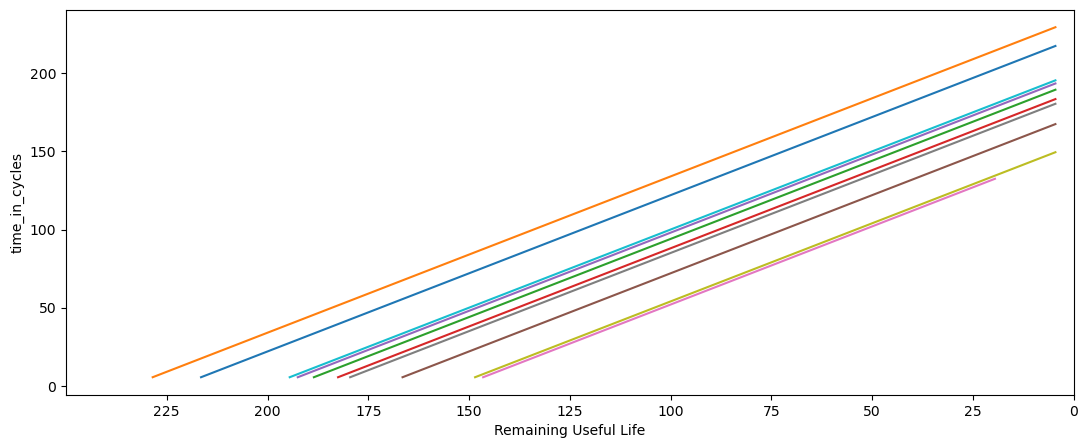

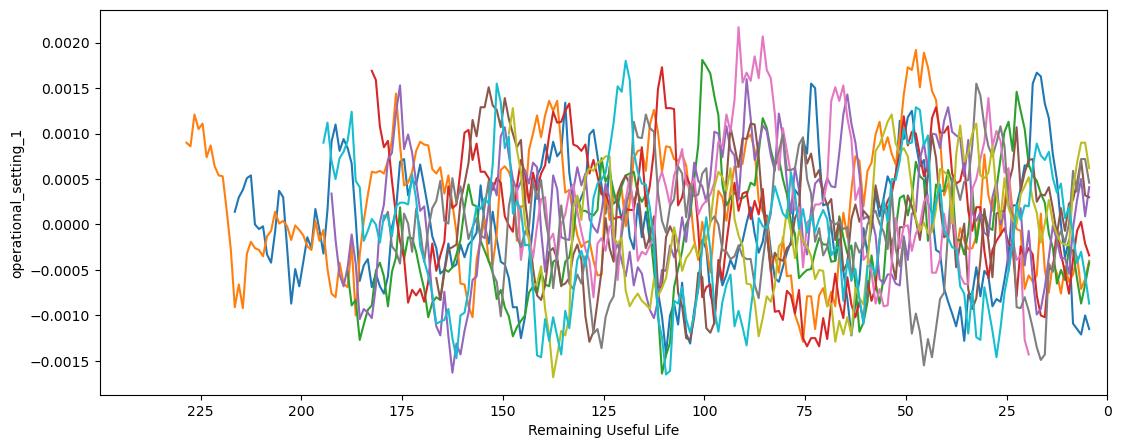

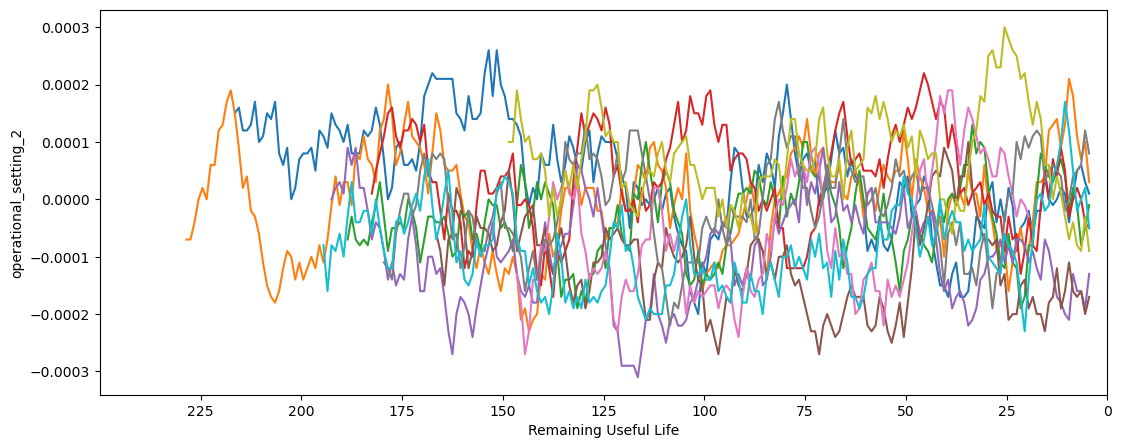

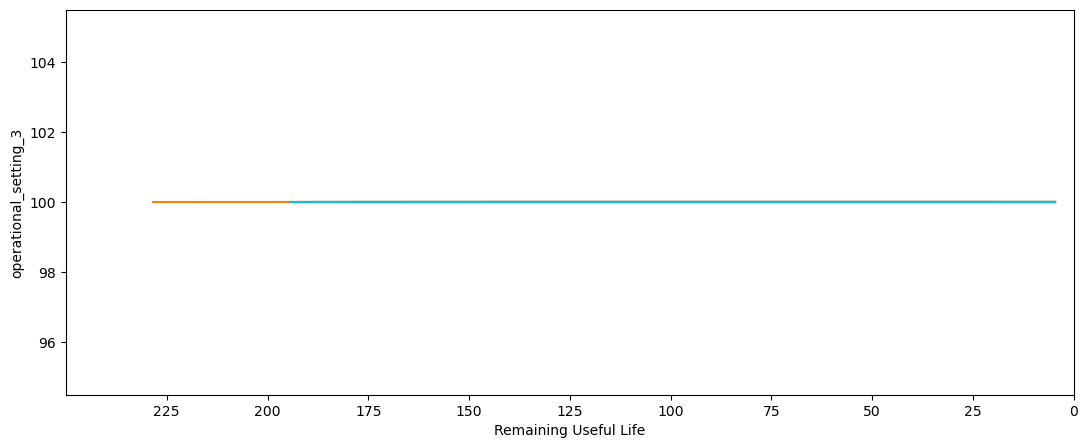

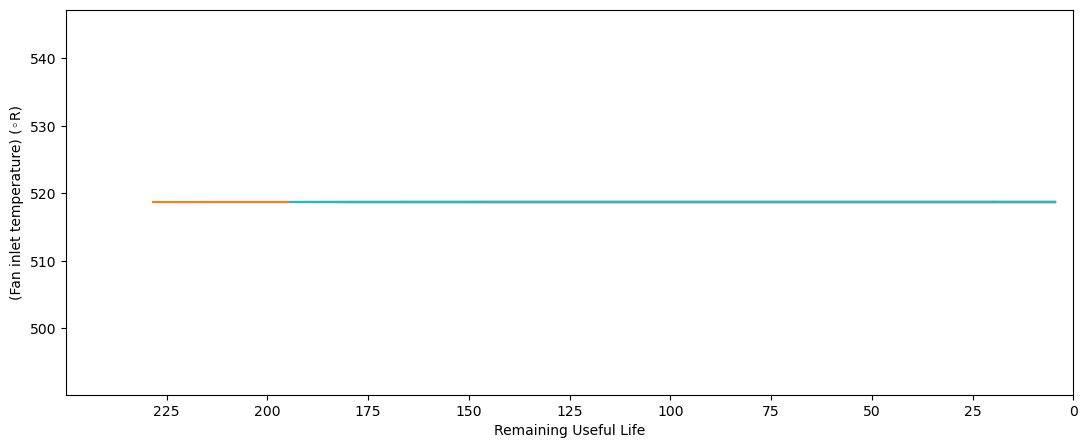

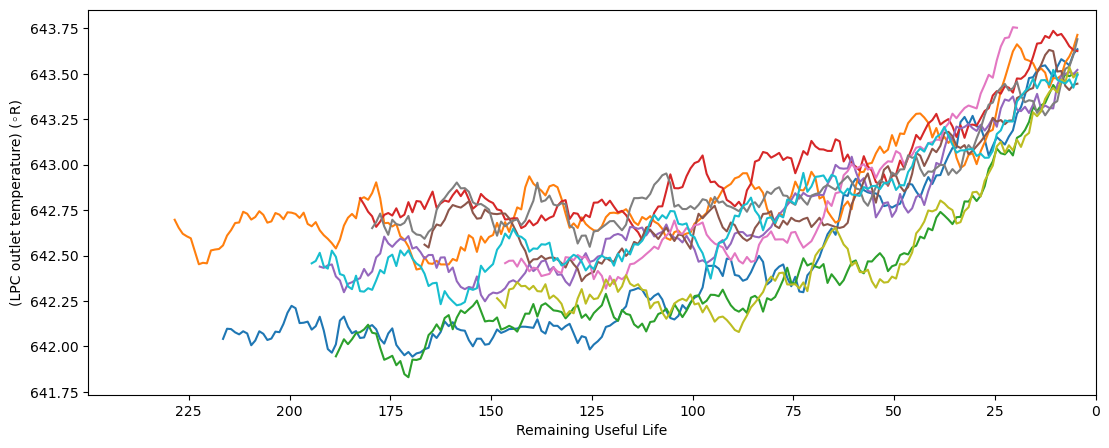

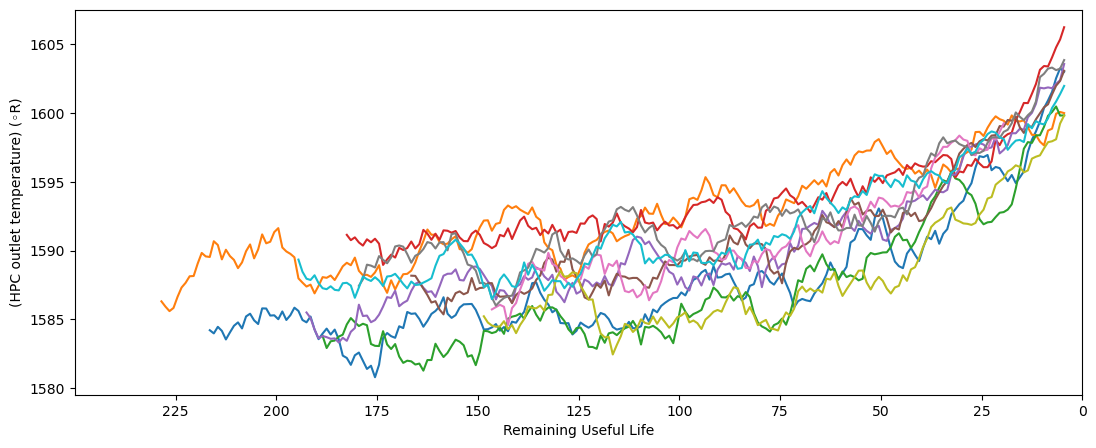

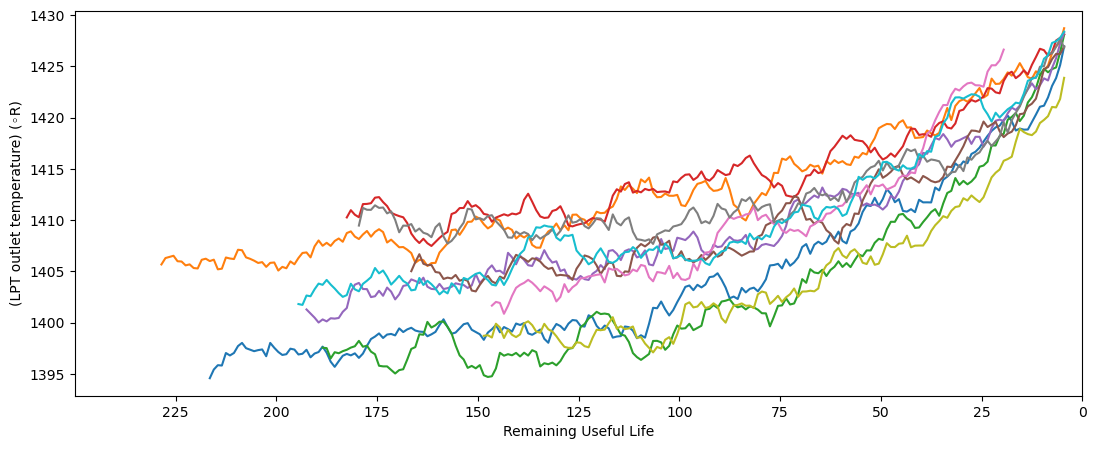

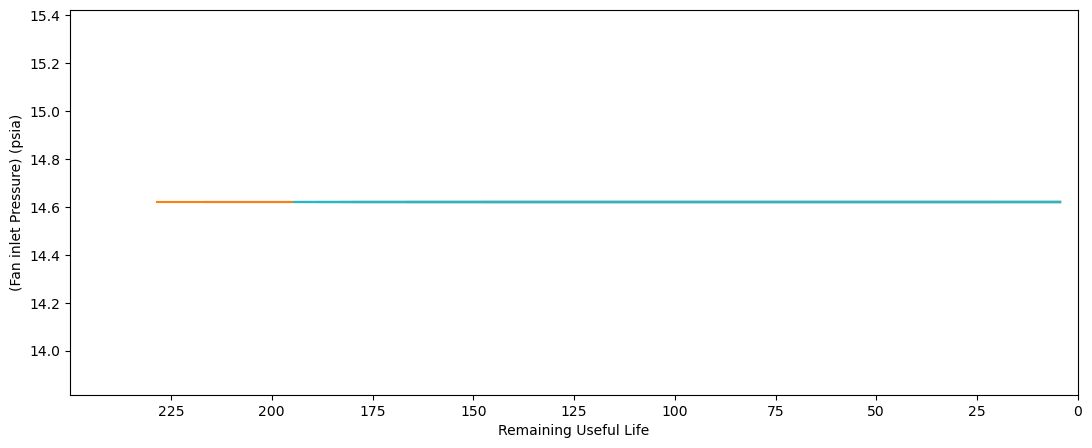

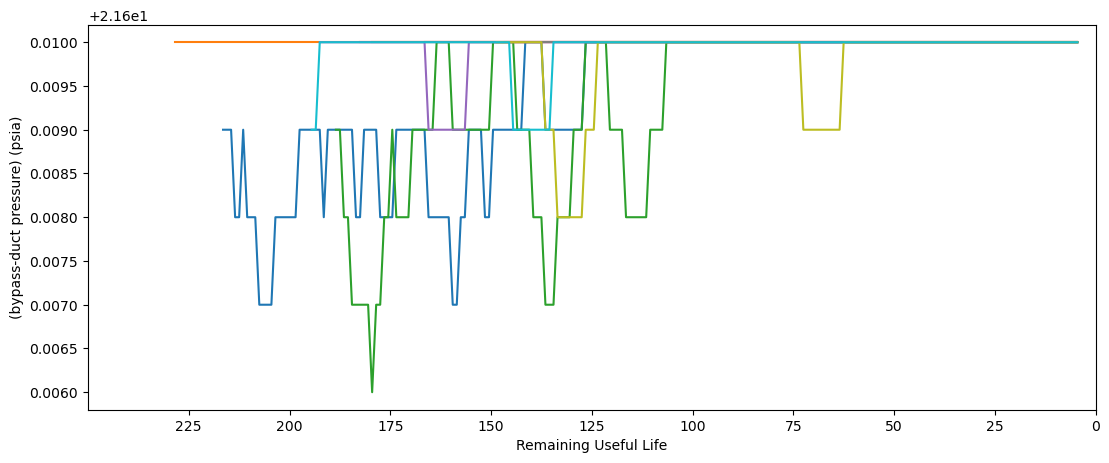

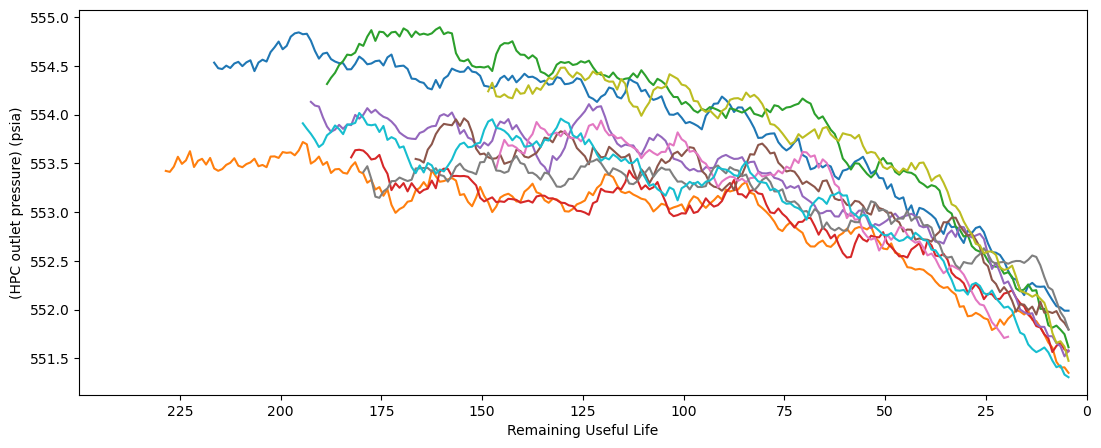

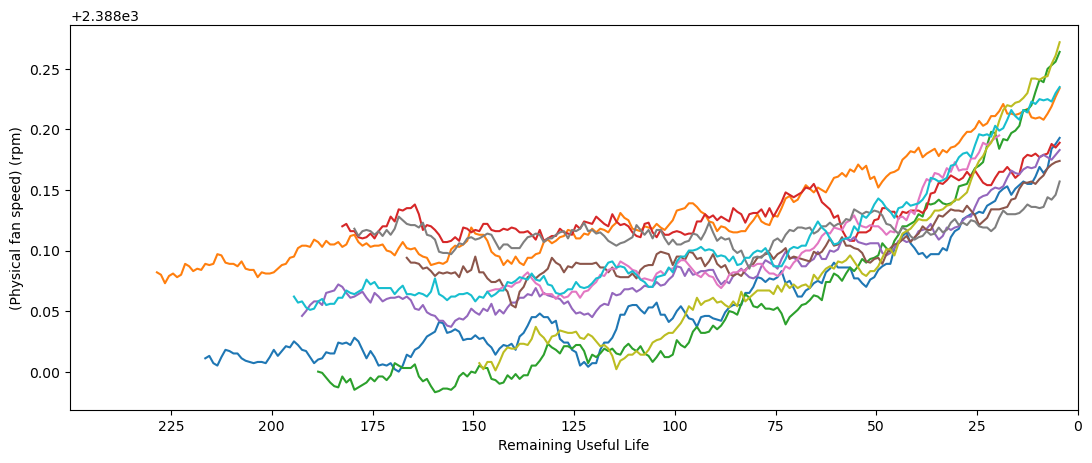

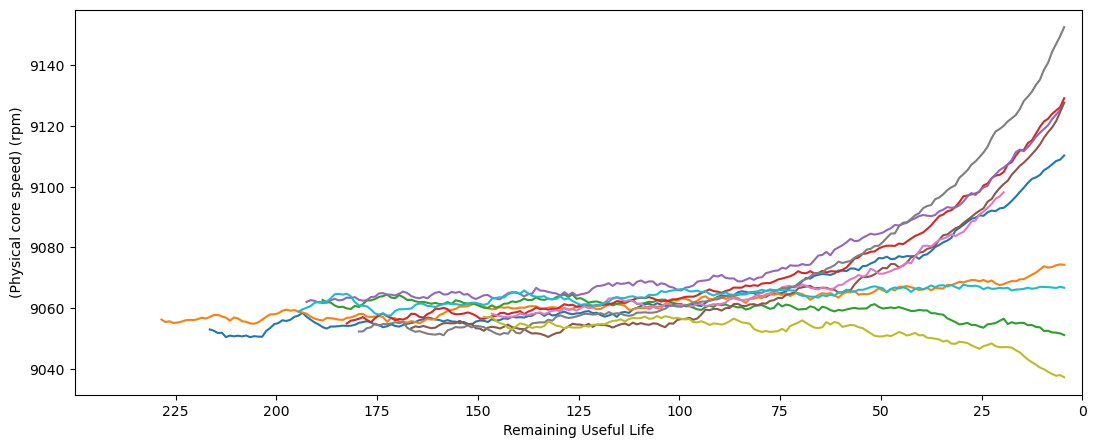

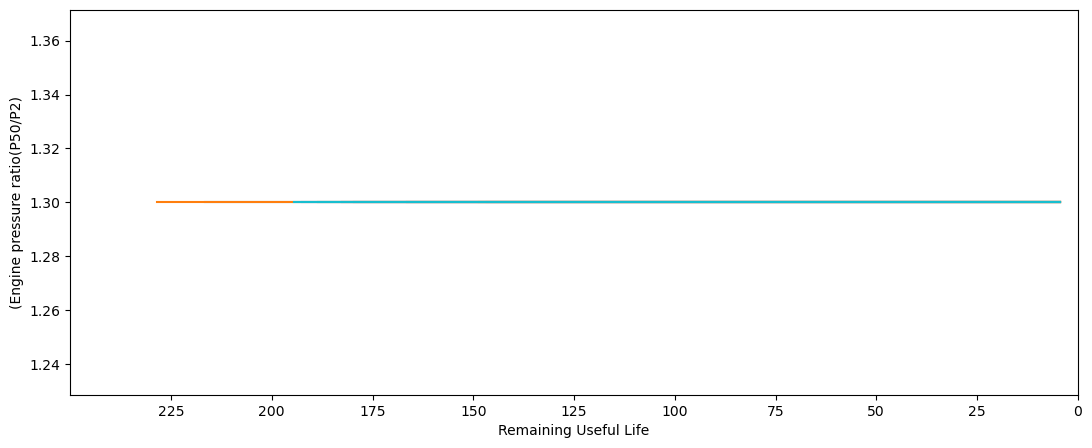

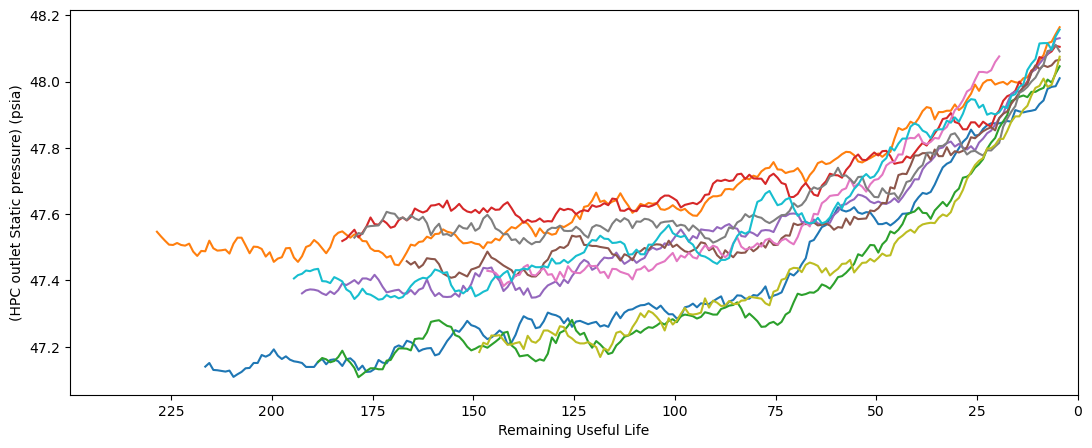

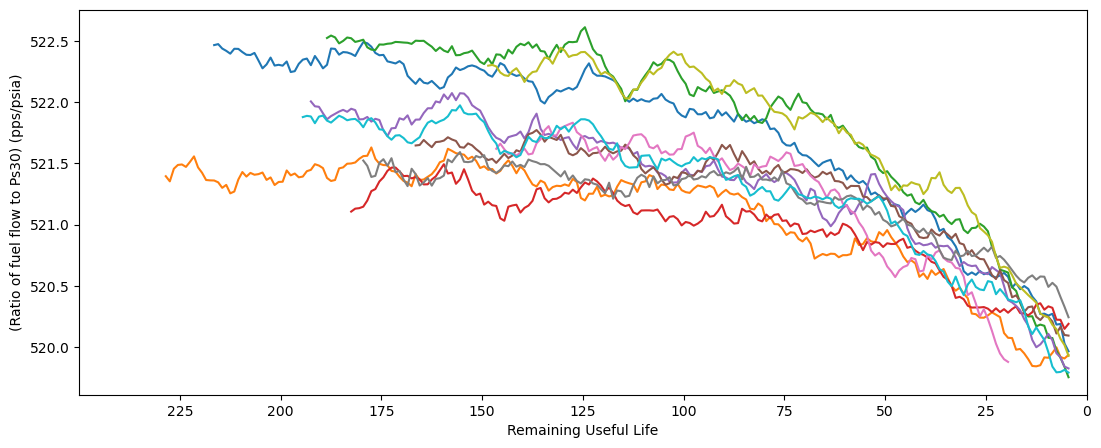

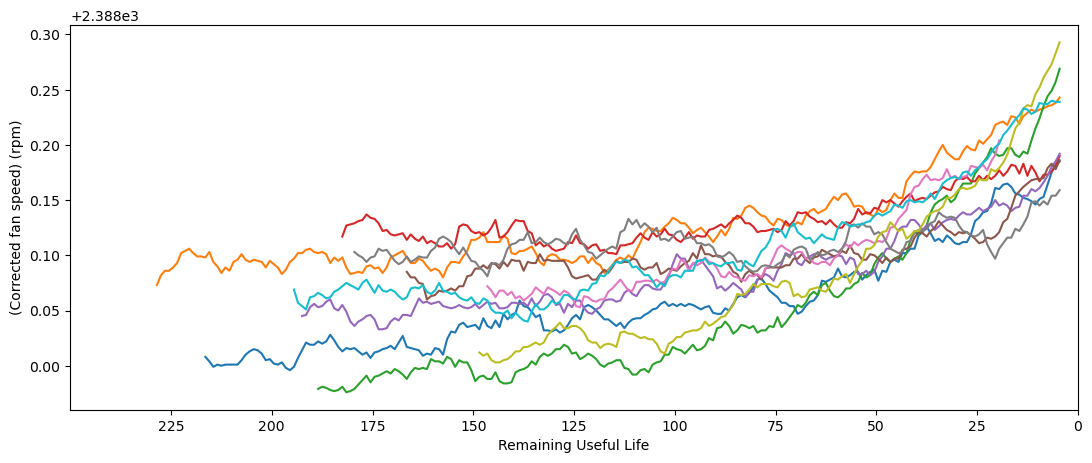

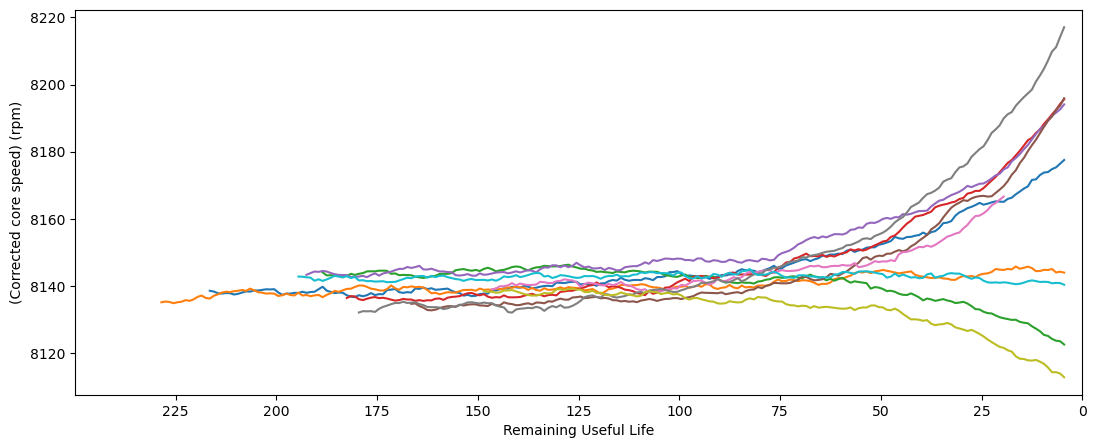

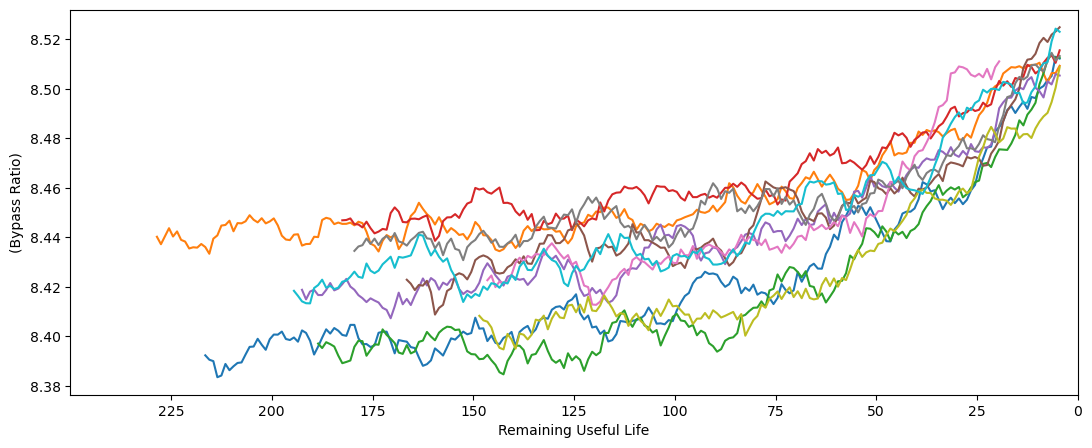

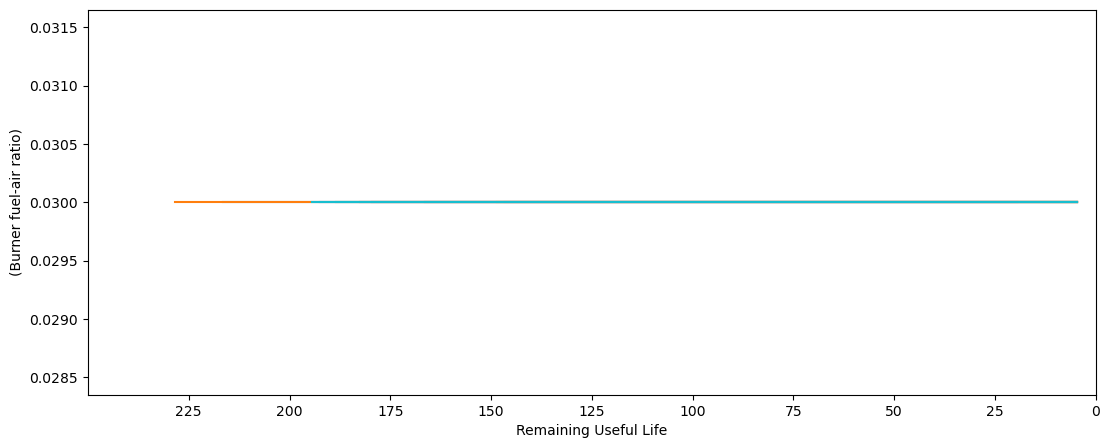

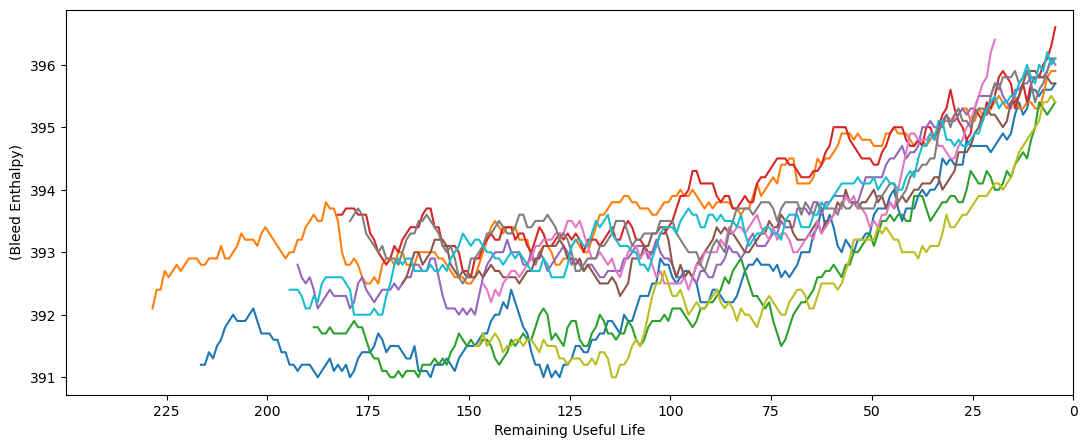

In [9]:
for i in range(1,22):
    try:
        plot_signal(train_df, train_df.columns[i])
    except:
        pass

## Wear Feature
Feature created to capture the baseline condition of each engine by averaging the first 5 cycles for each engine. This feature was added last to improve model accuracy but needed to be placed here before unit_number was dropped from the dataframe. 

In [10]:
# List of sensor columns to apply 
sensor_columns = [
    '(LPC outlet temperature) (◦R)',
    '(HPC outlet temperature) (◦R)',
    '(LPT outlet temperature) (◦R)',
    '(bypass-duct pressure) (psia)',
    '(HPC outlet pressure) (psia)',
    '(HPC outlet Static pressure) (psia)',
    '(Physical fan speed) (rpm)',
    '(Physical core speed) (rpm)',
    '(Corrected fan speed) (rpm)',
    '(Corrected core speed) (rpm)',
    '(Ratio of fuel flow to Ps30) (pps/psia)',
    '(Bypass Ratio)'
]
# Define a function to calculate initial wear based on the average of the first few cycles
def calculate_initial_wear(df, sensor_columns, cycles=5):
    initial_wear = df[df['time_in_cycles'] <= cycles].groupby('unit_number')[sensor_columns].mean()
    initial_wear.columns = [f'{col}_initial_wear' for col in sensor_columns]
    return initial_wear

# Apply the function 
initial_wear_features = calculate_initial_wear(combined_df, sensor_columns)

# Merge the initial wear features back into the main dataframe
combined_df = combined_df.merge(initial_wear_features, on='unit_number', how='left')
combined_df

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
33722          100             194                 0.0049   
33723          100             195                -0.0011   
33724          100             196                -0.0006   
33725          100             197                -0.0038   
33726          100             198                 0.0013   

       operational_setting_2  operational_setting_3  \
0                    -0.0004                  100.0   
1                    -0.0003                  100.0   
2                     0.0003                  100.0   
3                     0.0000                  100.0   
4                    -0.0002                  100.0   
...                      ...                    ...   
33722                 0.0000                  100.0   
33723                -0.0001                  100.0   
33724                -0.0003                  100.0   
33725                 0.0001                  100.0   
33726                 0.0003                  100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                            518.67                         641.82   
1                            518.67                         642.15   
2                            518.67                         642.35   
3                            518.67                         642.35   
4                            518.67                         642.37   
...                             ...                            ...   
33722                        518.67                         643.24   
33723                        518.67                         643.22   
33724                        518.67                         643.44   
33725                        518.67                         643.26   
33726                        518.67                         642.95   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
33722                        1599.45                        1415.79   
33723                        1595.69                        1422.05   
33724                        1593.15                        1406.82   
33725                        1594.99                        1419.36   
33726                        1601.62                        1424.99   

       (Fan inlet Pressure) (psia)  ...  \
0                            14.62  ...   
1                            14.62  ...   
2                            14.62  ...   
3                            14.62  ...   
4                            14.62  ...   
...                            ...  ...   
33722                        14.62  ...   
33723                        14.62  ...   
33724                        14.62  ...   
33725                        14.62  ...   
33726                        14.62  ...   

       (LPT outlet temperature) (◦R)_initial_wear  \
0                                        1401.934   
1                                        1401.934   
2                                        1401.934   
3                                        1401.934   
4                                        1401.934   
...                                           ...   
33722                          

## Rolling mean and standard deviation

- A moving average smooths out short-term fluctuations and highlights longer-term trends or cycles in the data. The rolling standard deviation measures the variability or volatility of the sensor readings over time.

- By averaging over cycles, rolling means reduces the variance in the sensor readings, making the model robust to minor fluctions. 

- While the rolling average tells you about the central tendency of the data over a window, the rolling standard deviation provides insight into how much the data fluctuates around that mean. Engine's near failure may cause greater fluctuations in the sensor data. 

<div class="alert alert-block alert-info">
<b>Note:</b> 
Rolling STD Dev made the accuracy worse so it was removed 
</div>

In [11]:
# creating rolling mean features for the selected sensor columns
for window in [5, 10]:  # Using rolling windows of 5 and 10 cycles
    rolling_mean = combined_df.groupby('unit_number')[sensor_columns].rolling(window=window).mean().reset_index(level=0, drop=True)
    rolling_mean.columns = [f'{col}_rolling_mean_{window}' for col in sensor_columns]

    combined_df = pd.concat([combined_df, rolling_mean], axis=1)

combined_df.dropna(inplace=True)  # Drop rows with NaN values resulting from rolling calculations
combined_df

unit_number  time_in_cycles  operational_setting_1  \
9                1              10                -0.0033   
10               1              11                 0.0018   
11               1              12                 0.0016   
12               1              13                -0.0019   
13               1              14                 0.0009   
...            ...             ...                    ...   
33722          100             194                 0.0049   
33723          100             195                -0.0011   
33724          100             196                -0.0006   
33725          100             197                -0.0038   
33726          100             198                 0.0013   

       operational_setting_2  operational_setting_3  \
9                     0.0001                  100.0   
10                   -0.0003                  100.0   
11                    0.0002                  100.0   
12                    0.0004                  100.0   
13                   -0.0000                  100.0   
...                      ...                    ...   
33722                 0.0000                  100.0   
33723                -0.0001                  100.0   
33724                -0.0003                  100.0   
33725                 0.0001                  100.0   
33726                 0.0003                  100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
9                            518.67                         641.71   
10                           518.67                         642.28   
11                           518.67                         642.06   
12                           518.67                         643.07   
13                           518.67                         642.35   
...                             ...                            ...   
33722                        518.67                         643.24   
33723                        518.67                         643.22   
33724                        518.67                         643.44   
33725                        518.67                         643.26   
33726                        518.67                         642.95   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
9                            1591.24                        1400.46   
10                           1581.75                        1400.64   
11                           1583.41                        1400.15   
12                           1582.19                        1400.83   
13                           1592.95                        1399.16   
...                              ...                            ...   
33722                        1599.45                        1415.79   
33723                        1595.69                        1422.05   
33724                        1593.15                        1406.82   
33725                        1594.99                        1419.36   
33726                        1601.62                        1424.99   

       (Fan inlet Pressure) (psia)  ...  \
9                            14.62  ...   
10                           14.62  ...   
11                           14.62  ...   
12                           14.62  ...   
13                           14.62  ...   
...                            ...  ...   
33722                        14.62  ...   
33723                        14.62  ...   
33724                        14.62  ...   
33725                        14.62  ...   
33726                        14.62  ...   

       (LPT outlet temperature) (◦R)_rolling_mean_10  \
9                                           1400.840   
10                                          1400.844   
11                                          1400.545   
12                                          1400.208   
13                                          1399.937   
...                                              ...   
33722     

The previous graphs of the data allowed us to look for non-linear correlations. Now we'll do a correllation plot to look for features that are highly linearly correlated. 

Features with high linear correlations should be analysed for possible removal as they can over-constrain the model (e.g. physical fan speed and corrected fan speed). Additionally, features with no linear or non-linear correlations should be removed as they aren't relevent to the target and reduce model accuracy. 

<Axes: >

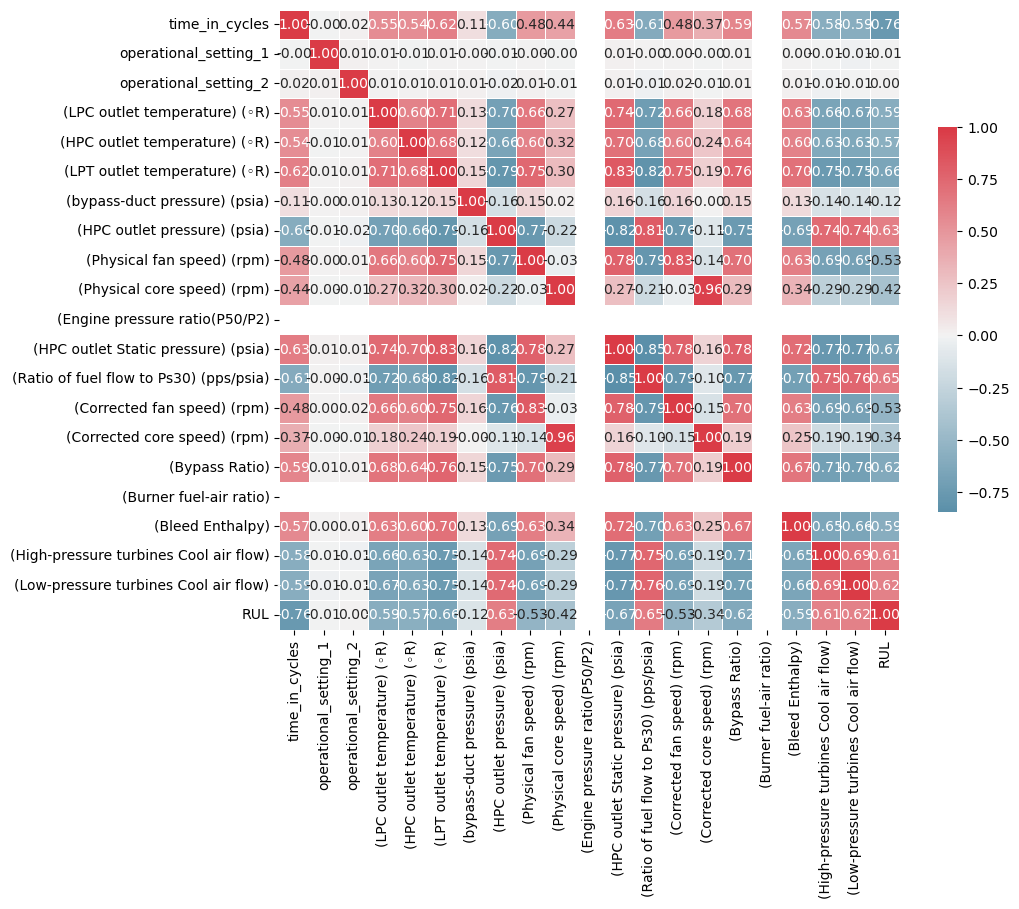

In [12]:
train_df.drop(columns=[
    'unit_number','operational_setting_3',
    '(Required fan speed)', '(Required fan conversion speed)',
    '(Fan inlet temperature) (◦R)','(Fan inlet Pressure) (psia)'
    ], axis = 1, inplace=True)
#find correlation
corr = train_df.corr()
#heatmap the coorelation
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230,10, as_cmap=True)
sns.heatmap(data=corr,center=0, square=True, linewidths=0.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

Dropping features for the next model

In [13]:
combined_df.drop(columns=[
    '(Fan inlet temperature) (◦R)',
    '(bypass-duct pressure) (psia)',
    '(HPC outlet pressure) (psia)',
    '(Fan inlet Pressure) (psia)',
    '(bypass-duct pressure) (psia)',
    '(Engine pressure ratio(P50/P2)',
    '(Burner fuel-air ratio)',
    '(Required fan speed)',
    '(Required fan conversion speed)',
    'unit_number',
    'operational_setting_3'
    ], axis=1, inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32827 entries, 9 to 33726
Data columns (total 53 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   time_in_cycles                                           32827 non-null  int64  
 1   operational_setting_1                                    32827 non-null  float64
 2   operational_setting_2                                    32827 non-null  float64
 3   (LPC outlet temperature) (◦R)                            32827 non-null  float64
 4   (HPC outlet temperature) (◦R)                            32827 non-null  float64
 5   (LPT outlet temperature) (◦R)                            32827 non-null  float64
 6   (Physical fan speed) (rpm)                               32827 non-null  float64
 7   (Physical core speed) (rpm)                              32827 non-null  float64
 8   (HPC outlet Static pressure) (p

# 2nd Try 

dropped features and adjusting hyperparameters

In [14]:

# Prepare the data for machine learning
feature_columns = [col for col in combined_df.columns if col not in ['RUL']]

X = combined_df[feature_columns]
# display(X)
y = combined_df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest regressor
model = RandomForestRegressor(
    n_estimators=500, 
    random_state=42, 
    max_features='sqrt', 
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=20,
    n_jobs=-1
    )
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Display the Mean Squared Error
print(f'Mean Squared Error of the model: {mse:.2f}')
print(type(y_pred))
print(type(y_test))

Root Mean Squared Error: 10.48
Mean Squared Error of the model: 109.90
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [15]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#sort by importance
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
display(importance_df)

Feature  Importance
0                                      time_in_cycles    0.224959
33  (HPC outlet Static pressure) (psia)_rolling_me...    0.047239
30       (LPT outlet temperature) (◦R)_rolling_mean_5    0.047204
39                      (Bypass Ratio)_rolling_mean_5    0.036951
21   (HPC outlet Static pressure) (psia)_initial_wear    0.031607
8                 (HPC outlet Static pressure) (psia)    0.026805
17         (HPC outlet temperature) (◦R)_initial_wear    0.026690
5                       (LPT outlet temperature) (◦R)    0.025562
24           (Corrected fan speed) (rpm)_initial_wear    0.024945
27                        (Bypass Ratio)_initial_wear    0.023993
18         (LPT outlet temperature) (◦R)_initial_wear    0.023908
23           (Physical core speed) (rpm)_initial_wear    0.023291
22            (Physical fan speed) (rpm)_initial_wear    0.023018
26  (Ratio of fuel flow to Ps30) (pps/psia)_initia...    0.021745
42      (LPT outlet temperature) (◦R)_rolling_mean_10    0.021627
25          (Corrected core speed) (rpm)_initial_wear    0.021238
16         (LPC outlet temperature) (◦R)_initial_wear    0.020525
38  (Ratio of fuel flow to Ps30) (pps/psia)_rollin...    0.020456
35         (Physical core speed) (rpm)_rolling_mean_5    0.020138
20          (HPC outlet pressure) (psia)_initial_wear    0.019845
45  (HPC outlet Static pressure) (psia)_rolling_me...    0.018787
28       (LPC outlet temperature) (◦R)_rolling_mean_5    0.018713
29       (HPC outlet temperature) (◦R)_rolling_mean_5    0.018514
51                     (Bypass Ratio)_rolling_mean_10    0.017332
37        (Corrected core speed) (rpm)_rolling_mean_5    0.016390
47        (Physical core speed) (rpm)_rolling_mean_10    0.016321
32        (HPC outlet pressure) (psia)_rolling_mean_5    0.015520
49       (Corrected core speed) (rpm)_rolling_mean_10    0.015295
7                         (Physical core speed) (rpm)    0.013948
9             (Ratio of fuel flow to Ps30) (pps/psia)    0.013540
11                       (Corrected core speed) (rpm)    0.010742
44       (HPC outlet pressure) (psia)_rolling_mean_10    0.010483
41      (HPC outlet temperature) (◦R)_rolling_mean_10    0.010191
50  (Ratio of fuel flow to Ps30) (pps/psia)_rollin...    0.010007
40      (LPC outlet temperature) (◦R)_rolling_mean_10    0.009713
14             (High-pressure turbines Cool air flow)    0.007711
12                                     (Bypass Ratio)    0.007599
48        (Corrected fan speed) (rpm)_rolling_mean_10    0.006209
46         (Physical fan speed) (rpm)_rolling_mean_10    0.005955
15              (Low-pressure turbines Cool air flow)    0.004971
19         (bypass-duct pressure) (psia)_initial_wear    0.004060
36         (Corrected fan speed) (rpm)_rolling_mean_5    0.003375
34          (Physical fan speed) (rpm)_rolling_mean_5    0.003245
3                       (LPC outlet temperature) (◦R)    0.002903
4                       (HPC outlet temperature) (◦R)    0.001941
13                                   (Bleed Enthalpy)    0.001616
6                          (Physical fan speed) (rpm)    0.000940
10                        (Corrected fan speed) (rpm)    0.000886
1                               operational_setting_1    0.000561
2                               operational_setting_2    0.000404
43      (bypass-duct pressure) (psia)_rolling_mean_10    0.000290
31       (bypass-duct pressure) (psia)_rolling_mean_5    0.000093

Grid Search: This was used to find the best hyperparameters

Results:
Takes ~ 17min to run:

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

In [16]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf' : [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# #initalize model
# rf = RandomForestRegressor(random_state=42)
# #set up grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 2, n_jobs=-1)
# # fit the model
# grid_search.fit(X_train, y_train)

# print('Best Parameters:', grid_search.best_params_)
# #Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

## Scale the data
using a min-max scaler to scale the data
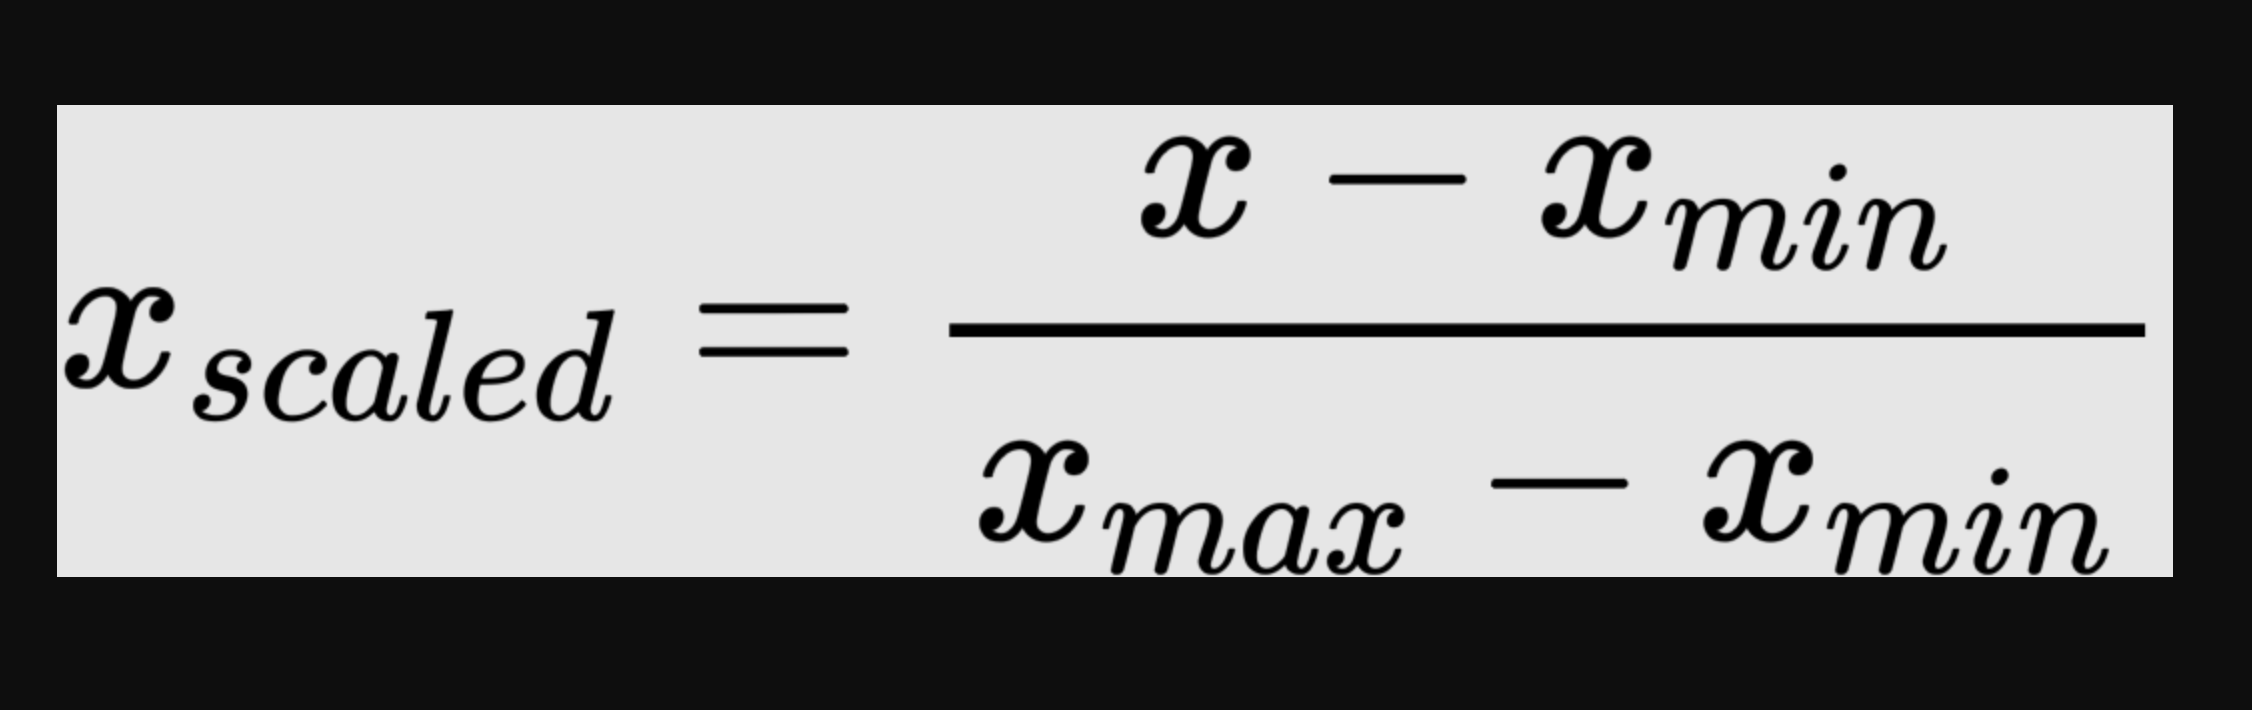

Scaling the data isn't necessary for random forest regressors and has no effect with this model, but will improve accuracy later when using the ensemble method. The ridge regressor and support vector regression can bias certain features with ridge's penalties or with SVM relying on marginal distance.  

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Scale x train
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation to the test dataset
X_test_scaled = scaler.transform(X_test)

# 3rd try

In [18]:
# Train a Random Forest regressor
model = RandomForestRegressor(
    n_estimators=500, 
    random_state=42, 
    max_features='sqrt', 
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=20,
    n_jobs=-1
    )
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Display the Mean Squared Error
print(f'Mean Squared Error of the model: {mse:.2f}')
print(type(y_pred))
print(type(y_test))

Root Mean Squared Error: 10.49
Mean Squared Error of the model: 109.95
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


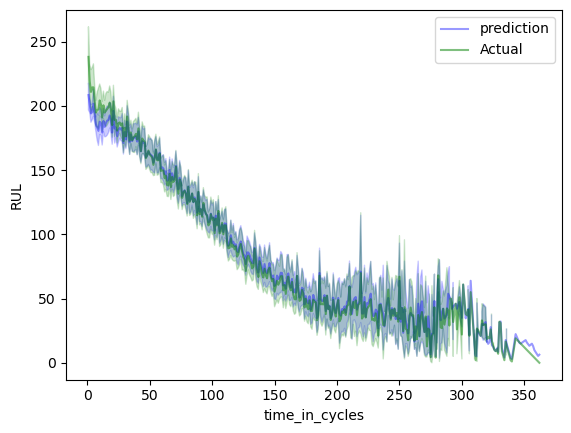

In [19]:
sns.lineplot(x=X_test['time_in_cycles'], y=y_pred, color = 'blue', label = 'prediction', alpha = 0.4)
sns.lineplot(x=X_test['time_in_cycles'], y=y_test, color = 'green', label = 'Actual', alpha = 0.5)
plt.show()

## Error Modeling
Making a model to predict residuals and then add them to the original model (fine tune)

In [21]:
y_pred_primary = model.predict(X_train) #prediction from original model
residuals = y_train - y_pred_primary #residuals from primary model
residual_model = RandomForestRegressor(n_estimators=500, random_state=42)
residual_model.fit(X_train, residuals)

# Make predictions on the test set using both models
y_pred_primary_test = model.predict(X_test) #using original model
y_pred_residuals = residual_model.predict(X_test)

# Adjust the primary predictions with the residual model's predictions
y_pred_final = y_pred_primary_test + y_pred_residuals

# Evaluate the final predictions
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f'Final Adjusted RMSE: {rmse_final:.2f}')

c:\ProgramData\Miniconda3\envs\recpy\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\ProgramData\Miniconda3\envs\recpy\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Final Adjusted RMSE: 3.46


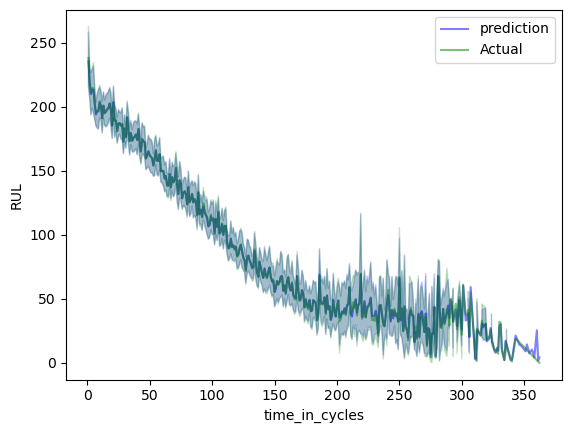

In [22]:
sns.lineplot(x=X_test["time_in_cycles"], y=y_pred_final, color = 'blue', label = 'prediction', alpha = 0.5)
sns.lineplot(x=X_test['time_in_cycles'], y=y_test, color = 'green', label = 'Actual', alpha = 0.5)
plt.show()

## Feature Importance for Residuals
Find what features are influencing the residuals 

In [23]:
feature_importance_residual = residual_model.feature_importances_
residual_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#sort by importance
residual_importance_df = residual_importance_df.sort_values(by = 'Importance', ascending = False)
display(importance_df)

Feature  Importance
0                                      time_in_cycles    0.224959
33  (HPC outlet Static pressure) (psia)_rolling_me...    0.047239
30       (LPT outlet temperature) (◦R)_rolling_mean_5    0.047204
39                      (Bypass Ratio)_rolling_mean_5    0.036951
21   (HPC outlet Static pressure) (psia)_initial_wear    0.031607
8                 (HPC outlet Static pressure) (psia)    0.026805
17         (HPC outlet temperature) (◦R)_initial_wear    0.026690
5                       (LPT outlet temperature) (◦R)    0.025562
24           (Corrected fan speed) (rpm)_initial_wear    0.024945
27                        (Bypass Ratio)_initial_wear    0.023993
18         (LPT outlet temperature) (◦R)_initial_wear    0.023908
23           (Physical core speed) (rpm)_initial_wear    0.023291
22            (Physical fan speed) (rpm)_initial_wear    0.023018
26  (Ratio of fuel flow to Ps30) (pps/psia)_initia...    0.021745
42      (LPT outlet temperature) (◦R)_rolling_mean_10    0.021627
25          (Corrected core speed) (rpm)_initial_wear    0.021238
16         (LPC outlet temperature) (◦R)_initial_wear    0.020525
38  (Ratio of fuel flow to Ps30) (pps/psia)_rollin...    0.020456
35         (Physical core speed) (rpm)_rolling_mean_5    0.020138
20          (HPC outlet pressure) (psia)_initial_wear    0.019845
45  (HPC outlet Static pressure) (psia)_rolling_me...    0.018787
28       (LPC outlet temperature) (◦R)_rolling_mean_5    0.018713
29       (HPC outlet temperature) (◦R)_rolling_mean_5    0.018514
51                     (Bypass Ratio)_rolling_mean_10    0.017332
37        (Corrected core speed) (rpm)_rolling_mean_5    0.016390
47        (Physical core speed) (rpm)_rolling_mean_10    0.016321
32        (HPC outlet pressure) (psia)_rolling_mean_5    0.015520
49       (Corrected core speed) (rpm)_rolling_mean_10    0.015295
7                         (Physical core speed) (rpm)    0.013948
9             (Ratio of fuel flow to Ps30) (pps/psia)    0.013540
11                       (Corrected core speed) (rpm)    0.010742
44       (HPC outlet pressure) (psia)_rolling_mean_10    0.010483
41      (HPC outlet temperature) (◦R)_rolling_mean_10    0.010191
50  (Ratio of fuel flow to Ps30) (pps/psia)_rollin...    0.010007
40      (LPC outlet temperature) (◦R)_rolling_mean_10    0.009713
14             (High-pressure turbines Cool air flow)    0.007711
12                                     (Bypass Ratio)    0.007599
48        (Corrected fan speed) (rpm)_rolling_mean_10    0.006209
46         (Physical fan speed) (rpm)_rolling_mean_10    0.005955
15              (Low-pressure turbines Cool air flow)    0.004971
19         (bypass-duct pressure) (psia)_initial_wear    0.004060
36         (Corrected fan speed) (rpm)_rolling_mean_5    0.003375
34          (Physical fan speed) (rpm)_rolling_mean_5    0.003245
3                       (LPC outlet temperature) (◦R)    0.002903
4                       (HPC outlet temperature) (◦R)    0.001941
13                                   (Bleed Enthalpy)    0.001616
6                          (Physical fan speed) (rpm)    0.000940
10                        (Corrected fan speed) (rpm)    0.000886
1                               operational_setting_1    0.000561
2                               operational_setting_2    0.000404
43      (bypass-duct pressure) (psia)_rolling_mean_10    0.000290
31       (bypass-duct pressure) (psia)_rolling_mean_5    0.000093

In [24]:
y_test.describe()

count    9849.000000
mean      118.773276
std        68.042176
min         0.000000
25%        65.000000
50%       117.000000
75%       166.000000
max       361.000000
Name: RUL, dtype: float64

## Ensemble Method / Stacking Regressor

"Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator." --

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [25]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor,HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# Define the base models
base_models = [
    ('rf', RandomForestRegressor
     (
        n_estimators=500, 
        random_state=42, 
        max_features='sqrt', 
        min_samples_leaf=4,
        min_samples_split=10,
        max_depth=20,
        n_jobs=-1
        )
    ),
    ('hist_gbr', HistGradientBoostingRegressor
     (
        max_iter=100, 
        learning_rate=0.1, 
        max_depth=None,  
        random_state=42
        )
    ),
    ('svr', SVR(kernel='rbf')) #Support Vector Regressor w/ Radial basis function kernel 
]

# Define the meta-model (Ridge Regression in this model)
meta_model = Ridge(alpha=1.0)

# Create the stacking regressor
stack_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking regressor
stack_regressor.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_stack = stack_regressor.predict(X_test_scaled)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
print(f'Stacked Model RMSE: {rmse_stack:.2f}')


Stacked Model RMSE: 4.91


Error modeling for the stacked model 

In [26]:
y_pred_primary = stack_regressor.predict(X_train_scaled) #prediction from stacked model
residuals = y_train - y_pred_primary #residuals from stacked model
residual_model = RandomForestRegressor(
        n_estimators=500, 
        random_state=42, 
    )
residual_model.fit(X_train_scaled, residuals)

# Make predictions on the test set using both models
y_pred_stack_test = stack_regressor.predict(X_test_scaled) #using original model
y_pred_residuals = residual_model.predict(X_test_scaled)

# Adjust the primary predictions with the residual model's predictions
y_pred_final = y_pred_stack_test + y_pred_residuals

# Evaluate the final predictions
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f'Final Adjusted RMSE: {rmse_final:.2f}')

Final Adjusted RMSE: 2.78


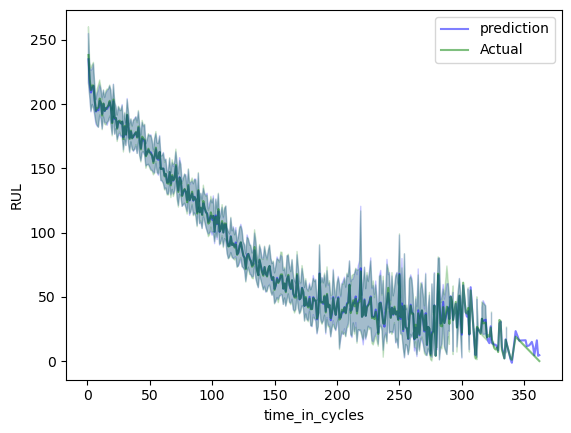

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x=X_test["time_in_cycles"], y=y_pred_final, color = 'blue', label = 'prediction', alpha = 0.5)
sns.lineplot(x=X_test['time_in_cycles'], y=y_test, color = 'green', label = 'Actual', alpha = 0.5)
plt.show()

### Interactive Plot

In [28]:
import plotly.tools as tls
import plotly.graph_objects as go

fig, ax = plt.subplots()
sns.lineplot(x=X_test["time_in_cycles"], y=y_pred_final, color = 'blue', label = 'prediction', alpha = 0.5)
sns.lineplot(x=X_test['time_in_cycles'], y=y_test, color = 'green', label = 'Actual', alpha = 0.5)
#make plot interactive
plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig.update_layout(
  yaxis_title = "RUL",
  xaxis_title = "time_in_cycles",
  hovermode = 'x unified',
  template = 'seaborn',
  width = 700,
  height = 500,
  legend = dict(font = dict(color="white")),
  xaxis = dict(fixedrange = False),
  yaxis = dict(fixedrange = False),
      margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
)
plotly_fig.update_layout(dragmode = 'zoom')
plotly_fig.show(config = {'scrollZoom':True})


c:\ProgramData\Miniconda3\envs\recpy\lib\site-packages\plotly\matplotlylib\renderer.py:571: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

c:\ProgramData\Miniconda3\envs\recpy\lib\site-packages\plotly\matplotlylib\renderer.py:609: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



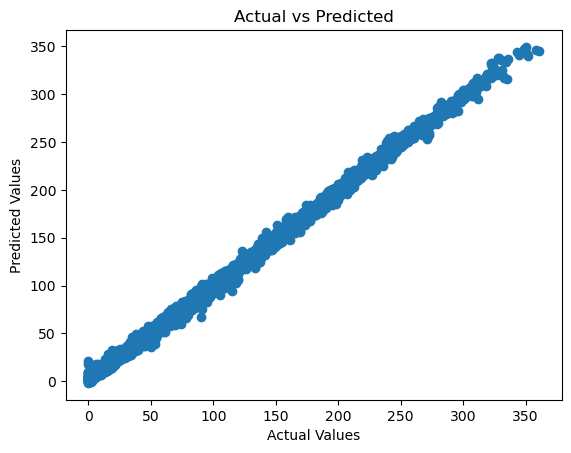

In [29]:
plt.scatter(y_test, y_pred_final)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

Other ways to improve (in progress):

Regularization techniques are methods used to prevent overfitting in machine learning models. Overfitting occurs when a model learns the noise or random fluctuations in the training data rather than the true underlying patterns, leading to poor performance on new, unseen data. 

Regularization adds constraints or penalties to the model, encouraging it to generalize better by being simpler or more robust.

***
## ML Cheat Sheet
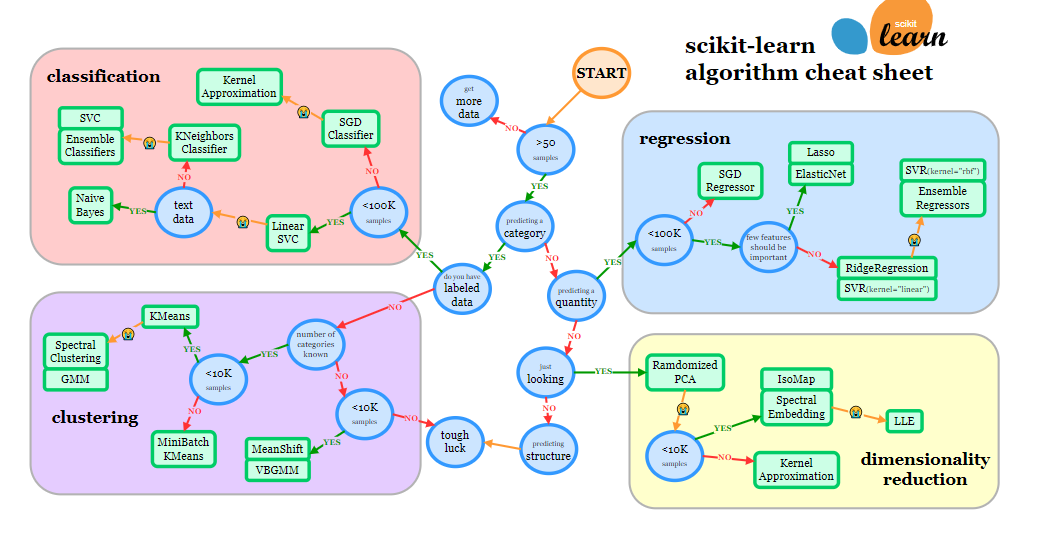

***
# 3D surface plot GUI

Demonstration plot using plotly inside of a Pyside GUI

In [1]:
import sys
import numpy as np
import plotly.graph_objs as go
from plotly.io import to_html

from PySide2.QtCore import QTimer, QUrl
from PySide2.QtWidgets import (
    QApplication, QVBoxLayout, QWidget, QDoubleSpinBox, QLabel, QPushButton
)
from PySide2.QtWebEngineWidgets import QWebEngineView

def build_surface_html(r: np.ndarray, frequency: float) -> str:
    """Return minimal HTML for the plotly figure (no file I/O)."""
    z = np.sin(frequency * r)  # r is cached hypot(x, y)
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(
        title=f"3D Surface: sin({frequency:.3g} · sqrt(x² + y²))",
        template="plotly_dark",
        scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    # Smallest payload; QWebEngine downloads plotly.js from CDN
    return to_html(fig, include_plotlyjs="cdn", full_html=False)

class PlotlyWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Plotly + PySide2 (no temp files)")
        self.resize(900, 700)

        # --- UI ---
        layout = QVBoxLayout(self)

        top = QWidget(self)
        top_layout = QVBoxLayout(top)
        layout.addWidget(top)

        self.label = QLabel("Frequency", self)
        self.freq = QDoubleSpinBox(self)
        self.freq.setRange(0.01, 50.0)
        self.freq.setSingleStep(0.05)
        self.freq.setValue(1.0)
        self.update_btn = QPushButton("Update Plot", self)

        top_layout.addWidget(self.label)
        top_layout.addWidget(self.freq)
        top_layout.addWidget(self.update_btn)

        self.view = QWebEngineView(self)
        layout.addWidget(self.view, stretch=1)

        # --- Data cache: grid & r = hypot(x, y) ---
        x = np.linspace(-5, 5, 180)
        y = np.linspace(-5, 5, 180)
        X, Y = np.meshgrid(x, y, indexing="xy")
        self.r = np.hypot(X, Y)  # cache to avoid recompute on every update

        # --- Wiring ---
        self.update_btn.clicked.connect(self.update_plot)

        # Debounce spins to avoid spamming renders
        self._debounce = QTimer(self)
        self._debounce.setSingleShot(True)
        self._debounce.setInterval(120)  # ms
        self.freq.valueChanged.connect(lambda _: self._debounce.start())
        self._debounce.timeout.connect(self.update_plot)

        # Initial render
        self.update_plot()

    def update_plot(self):
        f = float(self.freq.value())
        html = build_surface_html(self.r, f)
        # Base URL optional; helps relative resources if any
        self.view.setHtml(html, baseUrl=QUrl("https://cdn.plot.ly/"))

if __name__ == "__main__":
    app = QApplication(sys.argv)
    w = PlotlyWindow()
    w.show()
    sys.exit(app.exec_())


SystemExit: 0

c:\Users\ratre\anaconda3\envs\recpy\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

